<a href="https://colab.research.google.com/github/wesleybeckner/technology_fundamentals/blob/main/C4%20Machine%20Learning%20II/Tech_Fun_C4_S3_Numpy_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technology Fundamentals Course 4, Session 3: NumPy Vectorization

**Instructor**: Harsha Vardhan

**Contact**: harshav@uw.edu

**Teaching Assitants**: Varsha Bang, Wesley Beckner

**Contact**: vbang@uw.edu, wesleybeckner@gmail.com
<br>

---

<br>

# Losing your loops

## Python is slow!
 
* dynamically typed -- Python interpreter needs to compare and convert(if needed) in runtime everytime a variable is written, modified or referenced
* interpreted -- Vanilla Python comes with no compiler optimization
* Uses buffers inefficiently because Python lists aren't homogenous, thus making it super slow compared to languages like C, C++ or Julia. 

More info [here]("http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/").

### Timing a silly function in Python

In [ ]:
def silly(N):
    d = 0.0
    for i in range(N):
        d += (i % 3 -1) * i

In [ ]:
%timeit silly(10000)
#1000 loops, best of 5: 1.43 ms per loop

1000 loops, best of 5: 1.43 ms per loop


### Timing the same silly function in C

In [ ]:
%%writefile checktime.c

#include <time.h>
#include <stdio.h>

void silly(int N){
    int d = 0.0;
    for(int i=0; i <= N; i++){
        d = d + (i % 3 -1) * i;
    }
}

long double mean(long double arr[1000]){
    int i;
    long double sum = 0.0;
    long double average = 0.0;
    for(i = 0; i < 1000; i++){
       sum = sum + arr[i];
    }
    average = sum/1000;
    return average;
}

int main(){    
    long double time_elapsed = 0.0;
    long double mean_time = 0.0;
    long double min_time = 99.0;

    for(int j=0; j < 5; j++){
        long double timearr[1000];
        for(int i=0; i < 1000; i++){
            clock_t tic = clock(); 
            silly(10000);  
            clock_t toc = clock();
            time_elapsed = (long double)(toc - tic) / CLOCKS_PER_SEC;
            timearr[i] = time_elapsed;
        }
        mean_time = mean(timearr);
        if(mean_time < min_time){
            min_time = mean_time;
        }      
    }

    printf("1000 loops, best of 5: %Lf s per loop\n", min_time);
    return 0;  
}    

Writing checktime.c


In [ ]:
%%shell
gcc checktime.c -o output
./output
#1000 loops, best of 5: 0.000028 s per loop

1000 loops, best of 5: 0.000028 s per loop


As you can see, the same code timed in C is ~100x faster than in vanilla Python

<mark>"What makes Python fast (for development), is what makes it slow (in code execution)"</mark> -- Jake Vanderplas

## So, what's the remedy? Numpy!
or is it?
Let's check how Numpy compares with vanilla Python w.r.t. basic scalar Math operations

In [ ]:
import math
import numpy as np
%timeit math.log(10) #10000000 loops, best of 5: 165 ns per loop
%timeit np.log(10) #1000000 loops, best of 5: 1.21 µs per loop

The slowest run took 39.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 167 ns per loop
The slowest run took 105.22 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.19 µs per loop


In [ ]:
%timeit math.exp(3) #10000000 loops, best of 5: 131 ns per loop
%timeit np.exp(3) #1000000 loops, best of 5: 1.19 µs per loop

The slowest run took 64.42 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 128 ns per loop
The slowest run took 85.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.13 µs per loop


In [ ]:
# Sampling from a normal distribution
import random
%timeit random.gauss(0, 1) #1000000 loops, best of 5: 776 ns per loop
%timeit np.random.normal() #100000 loops, best of 5: 2.98 µs per loop

The slowest run took 11.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 775 ns per loop
The slowest run took 13.18 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.93 µs per loop


Matrix multiplication in vanilla Python

<p align="center">
<img src="https://www.mscroggs.co.uk/img/full/multiply_matrices.gif" width=500 height=200></img>
</p>




In [ ]:
def matmul_1(mat1, mat2):
    mat1_rows, mat1_cols = len(mat1), len(mat1[0])
    mat2_rows, mat2_cols = len(mat2), len(mat2[0])
    # assert mat1_cols == mat2_rows, "Check matrix dimensions"
    answer = [[0]*mat2_cols] * mat1_rows

    for i in range(mat1_rows):
        for j in range(mat2_cols):
            agg = 0
            for k in range(mat2_rows):
                agg += (mat1[i][k]*mat2[k][j])
            answer[i][j] = agg
    return answer

# matmul_1([[1,1],[1,1]], [[2,2],[2,2]])

<p align="center">
<img src="https://boydjohnson.dev/blog/concurrency-matrix-multiplication/matrix-multiplication-good.gif" width=400 height=300></img>
</p>


In [ ]:
%%timeit -n 10
matmul_1([[1]*50]*50, [[2]*50]*50) #10 loops, best of 5: 21.1 ms per loop

10 loops, best of 5: 21.3 ms per loop


#### Exercise: Matrix multiplication in Numpy loops

Write the same code as above, using Numpy arrays

In [ ]:
def matmul_2(mat1, mat2):
    ############################################################################
    ###  OPTIONAL: Complete this function to perform matmul on two ndarrays  ###
    ############################################################################
    mat1_rows, mat1_cols = mat1.shape
    mat2_rows, mat2_cols = mat2.shape
    # assert mat1_cols == mat2_rows, "Check matrix dimensions"
    answer = np.zeros((mat1_rows, mat2_cols))

    for i in np.arange(mat1_rows):
        for j in np.arange(mat2_cols):
            agg = 0
            for k in np.arange(mat2_rows):
                agg += (mat1[i,k]*mat2[k,j])
            answer[i,j] = agg
    return answer

# matmul_2(np.array([[1,1],[1,1]]), np.array([[2,2],[2,2]]))

In [ ]:
%%timeit -n 10
matmul_2(np.full((50,50), 1), np.full((50,50), 2)) # 10 loops, best of 5: 152 ms per loop

10 loops, best of 5: 144 ms per loop


Numpy is again slower than vanilla Python. 

_So, why are we discussing this? Numpy seems to be slower than vanilla Python right?_

Time to unleash Numpy's inner strength!!

## Vectorization, a.k.a. Array Programming

Definitions:
* This practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. [[Source](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html)]

* Generalizing operations we do on scalars (ie., single numbers) to apply transparently to vectors, matrices, and higher-dimensional arrays, which may be executed on a vector processor parallelly (either on a SIMD enabled CPU, or GPU).

The matrix multiplication example we looked at is one of the vector-equivalents to scalar multiplication.



<p align="center">
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig2_HTML.png?as=webp" width=500 height=500></img>
</p>

In [ ]:
%%timeit -n 10
np.matmul(np.ones((50,50)), np.ones((50,50))*2) #10 loops, best of 5: 42.1 µs per loop 

The slowest run took 23.61 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 5: 23 µs per loop


In this case it is evident that, vectorized Numpy is
* ~500x faster than vanilla Python
* ~3600x faster than loopy Numpy

So, we should somehow re-formulate the task-at-hand to a vectorized operation. This allows us to use Numpy's inbuilt vectorized functions. Fortunately, Numpy provides us many tricks to help us do this 

## Strategies to speed up vanilla Python using Numpy

Along with using these direct vectorized Numpy operations, we also have other tricks to speed-up things.

### **1. Universal functions** ([ufunc](https://numpy.org/doc/stable/reference/ufuncs.html))
A ufunc operates on ndarrays in an element-by-element fashion.
The idea is to push the loop into the compiled layer that underlies NumPy, thus avoiding the slow loops in Python. 

Just perform an operation on an ndarray like you would on a scalar value. Numpy would do it for every element in the array using its optimized C/Fortran routines beneath (check list of available ufuncs [here](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)).


#### Exercise: Computing reciprocals

In [ ]:
def compute_reciprocals(values):
    ############################################################################
    ###               TODO: Compute element wise reciprocals                 ###
    ############################################################################

        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 0.14285714, 0.16666667, 0.125     ])

Now, let's compute element-wise reciprocal using Numpy

In [ ]:
################################################################################
#####          TODO: Compute element wise reciprocals without loops        #####
################################################################################

Let's time the two functions now

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 5: 460 ms per loop


In [ ]:
%timeit (1.0 / big_array)

100 loops, best of 5: 2.61 ms per loop


In [ ]:
np.allclose((1.0/big_array), compute_reciprocals(big_array))

True

#### Arithmetic with arrays

Standard arithmetic operators are overloaded in Numpy to enable vectorization

In [ ]:
x = np.arange(10)
print("x      =", x)
print("x + 5  =", x + 5)
print("x - 5  =", x - 5)
print("x * 2  =", x * 2)
print("x / 2  =", x / 2)
print("x // 2 =", x // 2)   # floor division
print("-x     = ", -x)      # negation
print("x ** 2 = ", x ** 2)  # ??
print("x % 2  = ", x % 2)   # ??

x      = [0 1 2 3 4 5 6 7 8 9]
x + 5  = [ 5  6  7  8  9 10 11 12 13 14]
x - 5  = [-5 -4 -3 -2 -1  0  1  2  3  4]
x * 2  = [ 0  2  4  6  8 10 12 14 16 18]
x / 2  = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
x // 2 = [0 0 1 1 2 2 3 3 4 4]
-x     =  [ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
x ** 2 =  [ 0  1  4  9 16 25 36 49 64 81]
x % 2  =  [0 1 0 1 0 1 0 1 0 1]


In [ ]:
# Chaining ufuncs
-(0.5*x + 1) ** 0.5

array([-1.        , -1.22474487, -1.41421356, -1.58113883, -1.73205081,
       -1.87082869, -2.        , -2.12132034, -2.23606798, -2.34520788])

In [ ]:
theta = np.linspace(0, np.pi, 5)
print("theta      = ", theta)
print("sin(theta) = ", np.around(np.sin(theta), decimals=3))
print("cos(theta) = ", np.around(np.cos(theta), decimals=3))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         0.78539816 1.57079633 2.35619449 3.14159265]
sin(theta) =  [0.    0.707 1.    0.707 0.   ]
cos(theta) =  [ 1.     0.707  0.    -0.707 -1.   ]
tan(theta) =  [ 0.00000000e+00  1.00000000e+00  1.63312394e+16 -1.00000000e+00
 -1.22464680e-16]


#### Exercise: Count transitions
Given an ndarray consisting of booleans, find the count of `False` to `True` transitions

In [ ]:
np.random.seed(42)
bool_arr = np.random.choice([False, True], size=100000)
bool_arr

array([False,  True, False, ..., False,  True,  True])

Let's do it in vanilla Python

In [ ]:
def count_transitions(arr):
    ############################################################################
    ###               TODO: count False to True transitions                  ###
    ############################################################################


24872

Now, try doing the same in Numpy using vectorization

In [ ]:
################################################################################
###        TODO: count False to True transitions using vectorization         ###
################################################################################

24872

In [ ]:
%%timeit
count_transitions(bool_arr)  # 100 loops, best of 5: 9.02 ms per loop

100 loops, best of 5: 9.02 ms per loop


In [ ]:
%%timeit
(bool_arr[:-1] < bool_arr[1:]).sum()  # 1000 loops, best of 5: 230 µs per loop

The slowest run took 6.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 235 µs per loop


In [ ]:
%%timeit
np.sum(np.logical_and((~bool_arr[:-1]),  (bool_arr[1:]) ))

The slowest run took 10.21 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 128 µs per loop


### **2. Aggregations** 

Computing summary statistics over a data, like central tendencies, deviations, min, max, quantiles etc. can be vectorized using Numpy

Let's compare Python's aggregation functions with those of Numpy

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 5: 169 ms per loop
1000 loops, best of 5: 358 µs per loop


In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 5: 102 ms per loop
1000 loops, best of 5: 429 µs per loop


For min, max, sum, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

Multi-dimensional aggregates

In [ ]:
M = np.random.random((3, 4))
M

array([[0.98605807, 0.54045308, 0.87757307, 0.10617045],
       [0.97691551, 0.49071543, 0.34509847, 0.72707726],
       [0.53639792, 0.50609924, 0.91642494, 0.176205  ]])

By default, each NumPy aggregation function will return the aggregate over the entire array

In [ ]:
np.sum(M)

7.185188438301695

In [ ]:
M.min(axis=0)

array([0.53639792, 0.49071543, 0.34509847, 0.10617045])

In [ ]:
M.max(axis=1)

array([0.98605807, 0.97691551, 0.91642494])

The following table provides a list of useful aggregation functions available in Numpy

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

### Exercise: Mean centering 
Subtract the mean of the list `rand_list` from every element in the same 

In [ ]:
import random
rand_list = [random.randint(10,20) for i in range(10000)]

In [ ]:
def mean_center(data):
    ############################################################################
    #####     TODO: Complete this function in vanilla Python to perform    #####
    #####           mean centering. Don't forget to make a copy            #####
    ############################################################################


Now let's do it in Numpy using ufuncs

In [ ]:
def mean_center_with_numpy(data):
    ############################################################################
    #####         TODO: Now do the same without using any for-loops        #####
    ############################################################################
    
    rand_arr = np.array(data) # Convert to numpy array


np.allclose(mean_center(rand_list), mean_center_with_numpy(rand_list))

True

In [ ]:
%%timeit
mean_center(rand_list)   # 100 loops, best of 5: 2.2 ms per loop

100 loops, best of 5: 2.2 ms per loop


In [ ]:
%%timeit
mean_center_with_numpy(rand_list)   # 1000 loops, best of 5: 742 µs per loop

The slowest run took 11.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 742 µs per loop


### Exercise: Max profit over stock price data

You are given the stock closing price history as a sequence. Assume that you can make one purchase and one sale. What is the max profit that can be obtained?

Text(0, 0.5, 'Price')

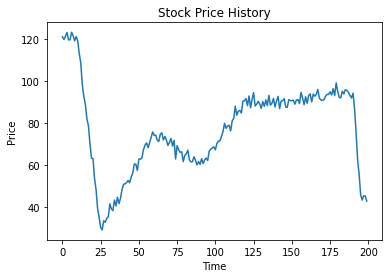

In [ ]:
# Generating the stock data
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
prices = np.full(200, fill_value=np.nan)
prices[[10, 25, 60, -5, 90 ,120, 150, 190]] = [120., 30., 75., 45., 60., 90., 90., 95.] # array indexing

x = np.arange(len(prices))
is_valid = ~np.isnan(prices)
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
prices += np.random.randn(len(prices)) * 2   # Gaussian noise

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Stock Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')

In [ ]:
def profit(prices):
    ############################################################################
    #####   TODO: Compute the max profit. Have two accumulators.           #####    
    #####         one to keep track of minima, one to record max profit    #####
    ############################################################################


In [ ]:
def profit_with_numpy(prices):
    ############################################################################
    #####   TODO: Compute the max profit in Numpy without any for-loops    #####    
    #####         check out <ufunc>.accumulate                             #####
    ############################################################################    


In [ ]:
print(profit(prices), profit_with_numpy(prices))
np.allclose(profit_with_numpy(prices), profit(prices))

72.38424361046988 72.38424361046988


True

In [ ]:
%%timeit
profit(prices)   # 10000 loops, best of 5: 59.8 µs per loop

10000 loops, best of 5: 59.8 µs per loop


In [ ]:
%%timeit
profit_with_numpy(prices)   # 100000 loops, best of 5: 8.34 µs per loop

The slowest run took 20.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 8.34 µs per loop


### **3. Broadcasting**

Numpy provides a set of rules which allows us to use ufuncs on arrays of different sizes and/or dimensions. 

Pseudocode of broadcasting:

```
if the arrays have different number of dims:
    left-pad the smaller shape array with 1s to match the number of dims 

if any particular dim doesn't match:
    if one of the those dims is a 1:
          broadcast this dim
    else:
          throw error
```

<p align="center">
<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/02.05-broadcasting.png" width=500 height=350></img>
</p>

Let's understand these 3 cases 

Case 1

In [ ]:
arr1 = np.arange(3)
arr2 = np.array(5) # scalar value
print(arr1.shape, arr2.shape)
print(arr1 + arr2)

(3,) ()
[5 6 7]


Case 2

In [ ]:
arr1 = np.ones((3,3))
arr2 = np.arange(3)
print(arr1.shape, arr2.shape)
print(arr1 + arr2)

(3, 3) (3,)
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [ ]:
 np.arange(3).reshape(1,3)

array([[0, 1, 2]])

Case 3

In [ ]:
arr1 = np.arange(3).reshape(3,1)
arr2 = np.arange(3)
print(arr1.shape, arr2.shape)
print(arr1 + arr2)

(3, 1) (3,)
[[0 1 2]
 [1 2 3]
 [2 3 4]]


#### Exercise: Verify if broadcast succeeds. 
and guess the shape of the resulting array

```
arr1 = np.random.rand(3,4,6,2) # random array of shape (3,4,6,2)
arr2 = np.random.rand(3,4,1,2) 

arr1 + arr2 
```

```
arr1 = np.random.rand(3,6,4,2) # random array of shape (3,6,4,2)
arr2 = np.random.rand(1,2) 

arr1 + arr2 
```

```
arr1 = np.random.rand(3,6,4,2) # random array of shape (3,6,4,2)
arr2 = np.random.rand(1,4,6,2) 

arr1 + arr2 
```

#### Exercise: Find the point closest to `<x,y>` among a set of points 

Refresher: _Eucledian distance between two points:_
<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/1200px-Euclidean_distance_2d.svg.png" width=400 height=300></img>
</p>

Hint: check out [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)


Generating our 2D points data, [`np.random.random`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html) returns a number from the uniform distribution of interval `[0.0, 1.0)`. 

If we want our samples to be uniformly distributed in interval `[a, b)` instead, we can do `(a - b) * np.random.random(...) + a`

In [ ]:
np.random.seed(42)
twod_points = (500) * np.random.random((10000, 2)) + 0
test_point = np.array([3,2])

In [ ]:
test_point.shape

(2,)

In [ ]:
def find_closest(data, point):
    ############################################################################
    #####         TODO: Find the closest point in vanilla Python           #####    
    ############################################################################ 
 

find_closest(twod_points, test_point)

array([2.75289958, 3.83201632])

In [ ]:
def find_closest_vect(data, point):
    ############################################################################
    #####         TODO: Find the closest point without for-loops           #####    
    ############################################################################   
    index = np.argmin(np.sqrt(np.sum((twod_points - test_point) ** 2, axis=1 )))
    return twod_points[index]
    
find_closest_vect(twod_points, test_point)

array([2.75289958, 3.83201632])

In [ ]:
%%timeit
find_closest(twod_points, test_point)  # 10 loops, best of 5: 45.3 ms per loop

10 loops, best of 5: 45.3 ms per loop


In [ ]:
%%timeit
find_closest_vect(twod_points, test_point)  # 1000 loops, best of 5: 297 µs per loop

1000 loops, best of 5: 297 µs per loop


#### Exercise: kNN
Now that we have seen how to compute the point closest to a test-point `<x, y>` among a set of training points, we are one step closer to kNN

Given a set of 2D co-ordinates, find the distance of each point with every other point. This step is crucial in finding out the 'k' in kNN. 

Let's consider **'k'= 3**, for this try. Follow the comments below

In [ ]:
################################################################################
### TODO: Find the pairwise distance. It's just one line using broadcasting ####
###       You should have a (10000, 10000, 3) matrix after this             ####    
################################################################################    



################################################################################
### TODO: Using pairwise distance matrix we computed, let's compute         ####
###       Euledian distance between the points. Again, just a line of code  ####
###       The output of this step should give a (10000,10000) shape array   ####
###       indicating the Eucledian distance of one point with every other   ####            
################################################################################    



################################################################################
### TODO: Now sort the (10000,10000) array on the desired axis.             ####
###       Check out `np.argsort`                                            ####        
################################################################################    




################################################################################
### TODO: Choose 'k' columns from the sorted (10000,10000) array to get     ####
###       the k-nearest neighbors of each point with others in the dataset  ####        
################################################################################    

 

array([[4493, 5672],
       [2493, 8782],
       [1586, 2975],
       [ 264, 4216],
       [3174, 5769],
       [8628, 1533],
       [3129, 7689],
       [2816, 3438],
       [4635, 2795],
       [2764, 3387]])

Verifying if what we did is indeed correct using sklearn's inbuilt kNN function

In [ ]:
from sklearn.neighbors import NearestNeighbors
d, i = NearestNeighbors().fit(twod_points).kneighbors(twod_points, 4)
i[:10, 1:3]

array([[4493, 5672],
       [2493, 8782],
       [1586, 2975],
       [ 264, 4216],
       [3174, 5769],
       [8628, 1533],
       [3129, 7689],
       [2816, 3438],
       [4635, 2795],
       [2764, 3387]])

#### Exercise: Converting a color image to grayscale 

Note: 
A png image has 4 channels: R, G, B and alpha, whereas a grayscale has only one channel. So we need a smart way to combine these 3 channels, which renders the image grayscale. 

_Multiply R channel by `0.2126`, G channel  by `0.7152`, B channel 
by `0.0722`, and ignore the alpha channel. Now add them up. This is 
the recipe to get a grayscale image [[source]](https://en.wikipedia.org/wiki/Grayscale)._

Code this using Numpy!

In [ ]:
# Reading the image
from urllib.request import urlopen
f = urlopen("https://hsasf.hsa.washington.edu/wp-content/uploads/2018/09/UW-Logo.png")
img = plt.imread(f)

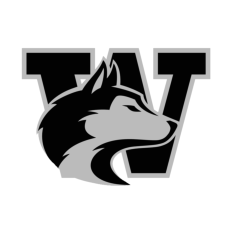

In [ ]:
################################################################################
#####   TODO: Convert a color png image to grayscale using broadcasting    #####    
#####         `img` has shape (height, width, 4)   
################################################################################

grayscale_image = ### TODO
plt.gca().set_axis_off()
plt.margins(0, 0)
plt.imshow(grayscale_image, cmap='gray')
plt.savefig("output_image_rotate.jpg",bbox_inches='tight', pad_inches=0)
plt.show()

# Exercise: Rotating an image

Any vector(point, `<x, y>`) in a 2D co-ordinate space can be rotated by angle $\theta$ by doing this
<p align="center">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/76cd56d49699c53e95cee42a40b340e0a167e078" width=400 height=100></img>
</p>

So, we have to rotate every pixel in our image by $\theta$ to rotate the whole image. Let's look at a way to do this using Python loops 


In [ ]:
# Reading the image
from urllib.request import urlopen
f = urlopen("https://hsasf.hsa.washington.edu/wp-content/uploads/2018/09/UW-Logo.png")
img = plt.imread(f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace as bp
def rotate_image(img, rot_deg=45):

    rot_rad = rot_deg * np.pi / 180.0

    height, width, num_channels = img.shape
    print("Height, Width, Channels before padding: ", height, width, num_channels)

    # Pad the input image with white space so that it won't get cropped 
    #     when we rotate it
    diagonal = int(np.sqrt(height * height + width * width))   # Pythagoras theorm
    img_padded = np.zeros((diagonal, diagonal, num_channels))
    center_h = int((diagonal - height) // 2)
    center_w = int((diagonal - width) // 2)
    img_padded[center_h:-center_h-1, center_w:-center_w-1, :] = img
    rotated_image = np.zeros((diagonal, diagonal, num_channels))
    height, width, num_channels = img_padded.shape

    print("Height, Width, Channels after padding: ", height, width, num_channels)

    rotated_height, rotated_width, _ = rotated_image.shape
    mid_row = int((rotated_height+1) / 2)
    mid_col = int((rotated_width+1) / 2)

    # for each pixel in output image, find which pixel
    #     it corresponds to in the input image
    for r in range(rotated_height): # iterating over rows
        for c in range(rotated_width): # iterating over cols
            # bp() 

            x = -(r-mid_row)*np.sin(rot_rad) + (c-mid_col)*np.cos(rot_rad)
            y = (r-mid_row)*np.cos(rot_rad) + (c-mid_col)*np.sin(rot_rad)

            #  add offset
            x += mid_col
            y += mid_row

            x = round(x)
            y = round(y)

            # print(r, " ", c, " corresponds to-> " , y, " ", x)
            #  boundary check: if x/y corresponds to a valid pixel in input image
            if (x >= 0 and y >= 0 and x < rotated_height and y < rotated_width):
                rotated_image[r][c][:] = img_padded[y][x][:]
    return rotated_image

In [ ]:
def rotate_image_vect(img, rot_deg=45):
    
    rot_rad = rot_deg * np.pi / 180.0

    height, width, num_channels = img.shape
    # print("Height, Width, Channels : ", height, width, num_channels)

    diagonal = int(np.sqrt(height * height + width * width))   # Pythagoras theorm
    img_padded = np.zeros((diagonal, diagonal, num_channels))
    center_h = int((diagonal - height) // 2)
    center_w = int((diagonal - width) // 2)
    img_padded[center_h:-center_h-1, center_w:-center_w-1, :] = img
    rotated_image = np.zeros((diagonal, diagonal, num_channels))
    height, width, num_channels = img_padded.shape

    rotated_height, rotated_width, _ = rotated_image.shape
    mid_row = int( (rotated_height+1)/2 )
    mid_col = int( (rotated_width+1)/2 )

    ############################################################################
    #####  TODO: Remove the nested-for-loops using vectorized operations   #####    
    ############################################################################  

    # CREATE THE ROTATION MATRIX as a (2,2) ndarray



    # CREATE A GRID/MATRIX OF INDICES, where each element of this matrix will be 
    #     one of the combinations of the nested-for-loop-indices. In other words,
    #     write the index space of the nested-for-loops as a matrix. 
    # HINT: check out `np.meshgrid`



    # CONVERT this grid into an ndarray, and reshape it to (2,-1) 
    # Make a copy of the grid ndarray you just created.
    # Remember that the input and output image have same shape. So we need two 
    #     copies of the grid ndarray we created. 



    # SUBTRACT `mid_row` and `mid_col` from `i_new`



    # PERFORM ROTATION on `i_new`
    # @ is short hand for dot-product/matmul



    # RECENTER (ie. add back) `mid_row` and `mid_col` to the output matrix of prev. step



    # CREATE the boolean mask to perform the boundary check

    

    # ASSIGN PIXELS FROM INPUT IMAGE TO THE ROTATED IMAGE USING THE mask created
    #     in the previous step. Remember, the mask created gives us the 
    #     valid/in-boundary pixel indices/location in the input image



    return rotated_image

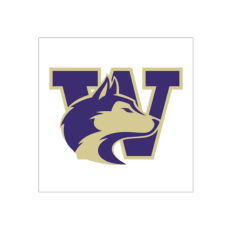

In [ ]:
# printing the padded image
# plt.gca().set_axis_off()
# plt.margins(0, 0)
# plt.imshow(img_padded)
# plt.show()

Height, Width, Channels before padding:  1400 1400 4
Height, Width, Channels after padding:  1979 1979 4


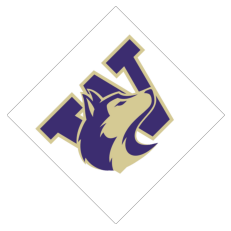

In [ ]:
plt.gca().set_axis_off()
plt.margins(0, 0)
rotated_image = rotate_image(img)
plt.imshow(rotated_image)
# plt.savefig("output_image_rotate.jpg",bbox_inches='tight', pad_inches=0)
plt.show()

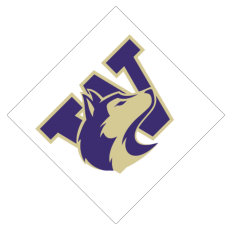

In [ ]:
plt.gca().set_axis_off()
plt.margins(0, 0)
rotated_image = rotate_image_vect(img)
plt.imshow(rotated_image)
# plt.savefig("output_image_rotate.jpg",bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
%%timeit
rotate_image(img) # 1 loop, best of 5: 51.7 s per loop

1 loop, best of 5: 51.7 s per loop


In [ ]:
%%timeit
rotate_image_vect(img) # 1 loop, best of 5: 577 ms per loop

1 loop, best of 5: 577 ms per loop


References:

1. [Jake Vanderplas' book](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
2. [Array Programming, Wikipedia](https://en.wikipedia.org/wiki/Array_programming)
3. [Nature article on Array programming in Numpy](https://www.nature.com/articles/s41586-020-2649-2)
4. [Numpy Array Programming blog](https://realpython.com/numpy-array-programming/)
3. [Rotating image without cv2, StackOverflow](https://stackoverflow.com/questions/57648391/how-do-i-rotate-an-image-manually-without-using-cv2-getrotationmatrix2d)